# How to Detect and Treat Outliers

This notebook illustrates how to detect and treat outliers using the IQR method and Z-score, and explores various treatment techniques.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, boxcox
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest

# Set seed for reproducibility
np.random.seed(42)

# Generate a dataset with outliers
data_size = 1000
data = pd.DataFrame({
    'returns': np.random.normal(loc=0, scale=1, size=data_size)
})
data.loc[::50] = 5  # Introduce outliers

# Display the first few rows of the dataset
print(data.head(3))

    returns
0  5.000000
1 -0.138264
2  0.647689



## 1. Detect Outliers

In [2]:
# IQR Method
Q1 = data['returns'].quantile(0.25)
Q3 = data['returns'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = data[(data['returns'] < lower_bound) | (data['returns'] > upper_bound)]
print("Number of outliers detected using IQR method:", len(outliers_iqr))

# Z-score Method
z_scores = zscore(data['returns'])
outliers_zscore = data[np.abs(z_scores) > 3]
print("Number of outliers detected using Z-score method:", len(outliers_zscore))


Number of outliers detected using IQR method: 27
Number of outliers detected using Z-score method: 21


## 2. Treat Outliers

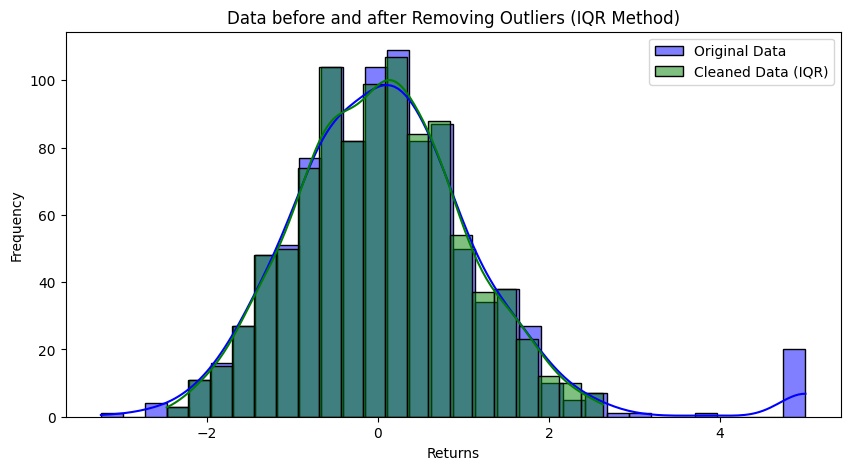

In [3]:
# Remove Outliers using IQR Method
data_cleaned_iqr = data[(data['returns'] >= lower_bound) & (data['returns'] <= upper_bound)]

# Winsorize Outliers using IQR Method
data_winsorized_iqr = data.copy()
data_winsorized_iqr['returns'] = data_winsorized_iqr['returns'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Plot IQR Method
plt.figure(figsize=(10, 5))
sns.histplot(data['returns'], kde=True, color='blue', label='Original Data')
sns.histplot(data_cleaned_iqr['returns'], kde=True, color='green', label='Cleaned Data (IQR)')
plt.title('Data before and after Removing Outliers (IQR Method)')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### IQR Plot Explanation

The IQR plot visualizes the distribution of the original data and the data after removing outliers using the IQR method. The blue histogram represents the original data, which includes outliers, while the green histogram represents the cleaned data after removing outliers. This visualization helps in understanding the impact of outlier removal on the data distribution.


## Summary of Handling Outliers

1. **Detection**:
   - **IQR Method**: Identify outliers as values outside the range `[Q1 - 1.5·IQR, Q3 + 1.5·IQR]`.
   - **Z-score Method**: Identify outliers as values with `|z| > 3`.

2. **Treatment**:
   - **Remove Outliers**: Filter out the detected outliers.
   - **Winsorize Outliers**: Cap the outliers at the specified bounds.
   - **Transform Features**: Apply log or Box-Cox transformations to reduce skewness.
   - **Use Robust Models**: Apply `RobustScaler` or `IsolationForest` to handle outliers robustly.

